<a href="https://colab.research.google.com/github/Sak724/CSE437_Lab-Reports/blob/main/lab1-bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [34]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm', 'seed', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [35]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

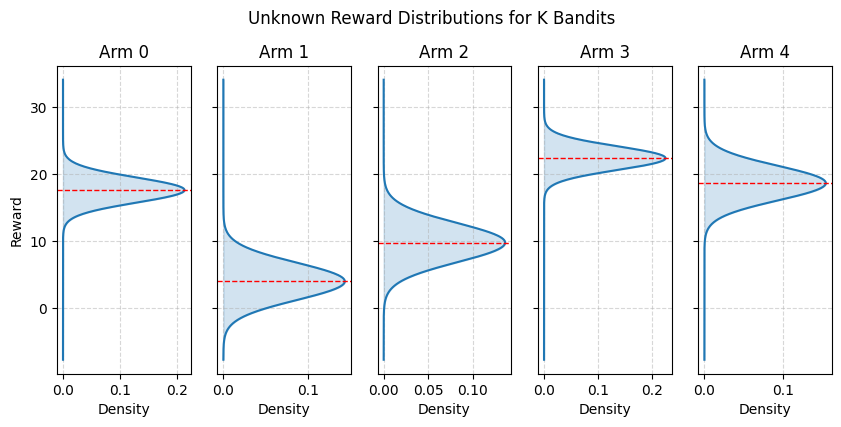

In [36]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

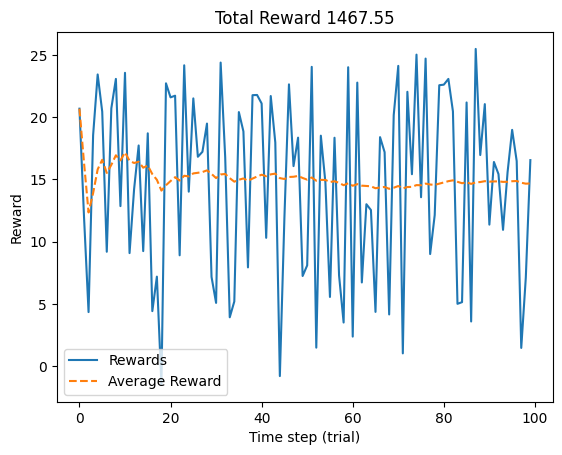

In [37]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

First 20 arms pulled: [0, 1, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


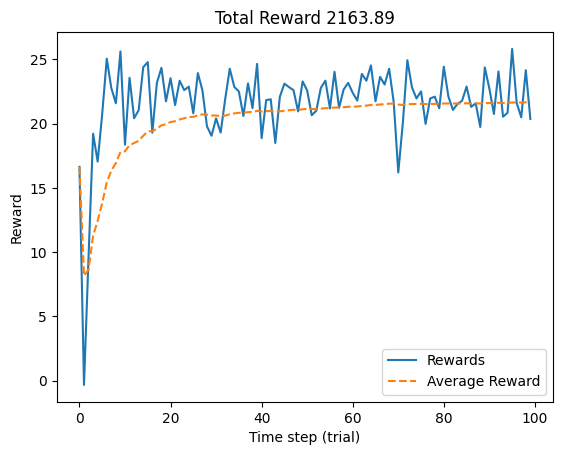

In [38]:
import numpy as np

k = len(bandit_mean)                # number of arms
Q = np.zeros(k, dtype=float)        # estimated mean rewards
N = np.zeros(k, dtype=int)          # pull counts

rewards = []
chosen_arms = []

# For T trials
for t in range(T):
    # ACTION: My policy = try each arm once, then choose the best so far
    if t < k:
        a = t
    else:
        a = int(np.argmax(Q))       # greedy choice

    chosen_arms.append(a)

    # REWARD
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # sample average
    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]

# Total reward
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

print("First 20 arms pulled:", chosen_arms[:20])

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



First 20 arms pulled: [0, 1, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


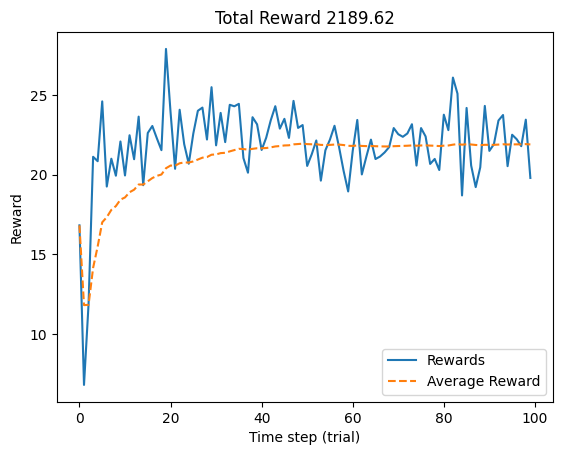

In [39]:
import numpy as np

k = len(bandit_mean)
Q = np.zeros(k, dtype=float)
N = np.zeros(k, dtype=int)

rewards = []
chosen_arms = []

for t in range(T):
    # ACTION: Greedy = always choose arm with highest estimated average
    if t < k:
        a = t
    else:
        a = int(np.argmax(Q))       # greedy choice

    chosen_arms.append(a)

    # REWARD
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # sample average
    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]

# Total reward
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

print("First 20 arms pulled:", chosen_arms[:20])


First 20 arms pulled: [0, 1, 2, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3]


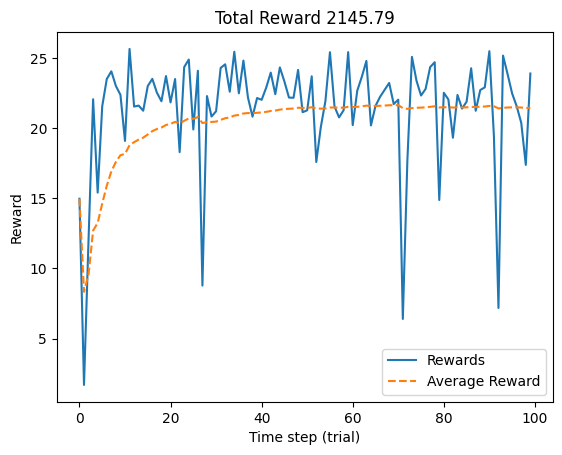

In [40]:
import numpy as np

epsilon = 0.10  # @param {"type":"number"}
k = len(bandit_mean)
Q = np.zeros(k, dtype=float)    # estimated mean reward per arm
N = np.zeros(k, dtype=int)      # pulls per arm

rewards = []
chosen_arms = []

for t in range(T):
    # ACTION
    if t < k:
        a = t
    else:
        if np.random.rand() < epsilon:
            a = int(np.random.randint(0, k))      # explore
        else:
            a = int(np.argmax(Q))                 # exploit

    chosen_arms.append(a)

    # REWARD
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # sample average
    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]

# Total reward
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

print("First 20 arms pulled:", chosen_arms[:20])



First 20 arms pulled: [0, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


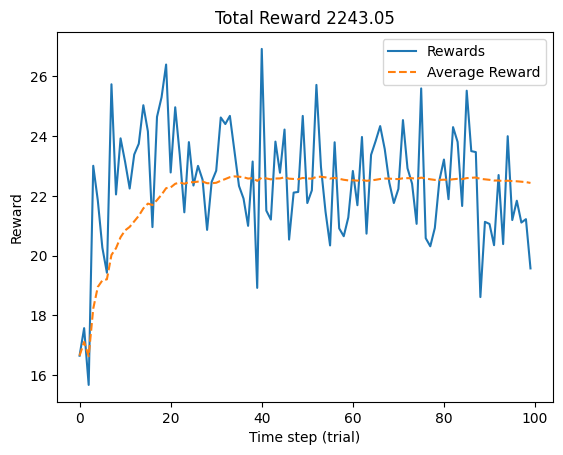

In [41]:
import numpy as np

k = len(bandit_mean)

# Prior over each arm's mean: Normal(m0, s0^2) — weak/vague prior
m0 = 0.0
s0_sq = 100.0   # large variance = weak prior

# Known observation variance per arm
sigma_sq = (bandit_std ** 2).astype(float)

N = np.zeros(k, dtype=int)      # number of pulls
S = np.zeros(k, dtype=float)    # sum of observed rewards

rewards = []
chosen_arms = []

for t in range(T):
    # v_a = 1 / (1/s0^2 + N_a / sigma^2)
    # m_a = v_a * (m0/s0^2 + S_a / sigma^2)
    v = 1.0 / (1.0 / s0_sq + N / sigma_sq)
    m = v * (m0 / s0_sq + S / sigma_sq)

    # Thompson step: sample one mean from each posterior, pick the best sample
    samples = np.random.normal(loc=m, scale=np.sqrt(v))
    a = int(np.argmax(samples))
    chosen_arms.append(a)

    # Pull selected arm and observe reward
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # sufficient stats for that arm
    N[a] += 1
    S[a] += r

# Total reward
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

print("First 20 arms pulled:", chosen_arms[:20])


# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1A. Using ε = 0.1 means the agent explores more often, which helps it quickly gather enough information to identify the best arm. This prevents it from getting stuck on a bad choice early on. With ε = 0.001, the agent almost never explores, so if it makes an unlucky start, it might stay with the wrong arm for the whole run. A larger ε improves adaptability and reliability in the long run. The trade-off is that you sacrifice some reward in the short term by pulling weaker arms during exploration.

2A. A purely greedy strategy is not effective when the environment changes over time. Once it picks what looks like the best arm, it never goes back to check the others. If the reward distributions shift, it won’t notice, and it will keep exploiting an arm that may no longer be the best. Without exploration, the greedy agent is blind to changes. In such cases, strategies that keep exploring are much more effective.

3A. The value of ε directly sets the balance between exploration and exploitation. A larger ε forces more exploration, which reduces the risk of missing better arms but lowers short-term performance. A smaller ε increases exploitation, leading to higher immediate rewards but greater risk of locking onto the wrong arm. Over the long run, neither extreme is ideal: too much exploration wastes trials, while too little stops the agent from improving. The key is tuning ε to strike the right balance.

4A. When the number of arms is small, random exploration is manageable. But when the number of arms grows large, ε-greedy becomes less efficient, because many exploratory pulls are wasted on clearly poor arms. This slows down learning and makes it harder to focus on the truly good arms. With many arms, a fixed ε value can hurt performance more severely. To handle this, ε may need to be reduced or combined with smarter exploration methods.